In [14]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import re
import os
import itertools

from jitter import *
import plot_styling
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
plot_styling.setup('paper')

In [4]:
attention_maps = pd.read_pickle('../attention-maps-ucf101-with-metadata.pickle')

In [5]:
attention_maps[(attention_maps.Network == 'Spatial') & (attention_maps['EBP Type'] == 'Non-Contrastive')].groupby('Clip')['Frame'].count().mean()

185.72999999999999

In [6]:
jitter_df = attention_maps.groupby(['Network', 'EBP Type']).apply(jitter)
jitter_df.reset_index(drop=True, inplace=True)
jitter_df.head()

,Action,Clip,EBP Type,Frame,Jitter,Network,Type,Video,Window Size
0,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,1,39.643074,Spatial,Spatial Contrastive,04,1
1,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,2,96.708359,Spatial,Spatial Contrastive,04,1
2,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,3,79.917984,Spatial,Spatial Contrastive,04,1
3,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,4,78.418068,Spatial,Spatial Contrastive,04,1
4,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,5,68.907013,Spatial,Spatial Contrastive,04,1


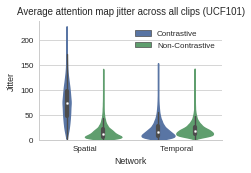

In [41]:
plt.figure(figsize=(3.5,2.5))
sns.violinplot(x='Network', y='Jitter', hue='EBP Type', data=jitter_df, cut=0)
plt.title("Average attention map jitter across all clips (UCF101)")
plt.ylim(0)
plt.legend(bbox_to_anchor=(1, 0.98))
sns.despine()

plt.tight_layout()
plt.savefig('average-jitter-distribution-ucf101.pdf')

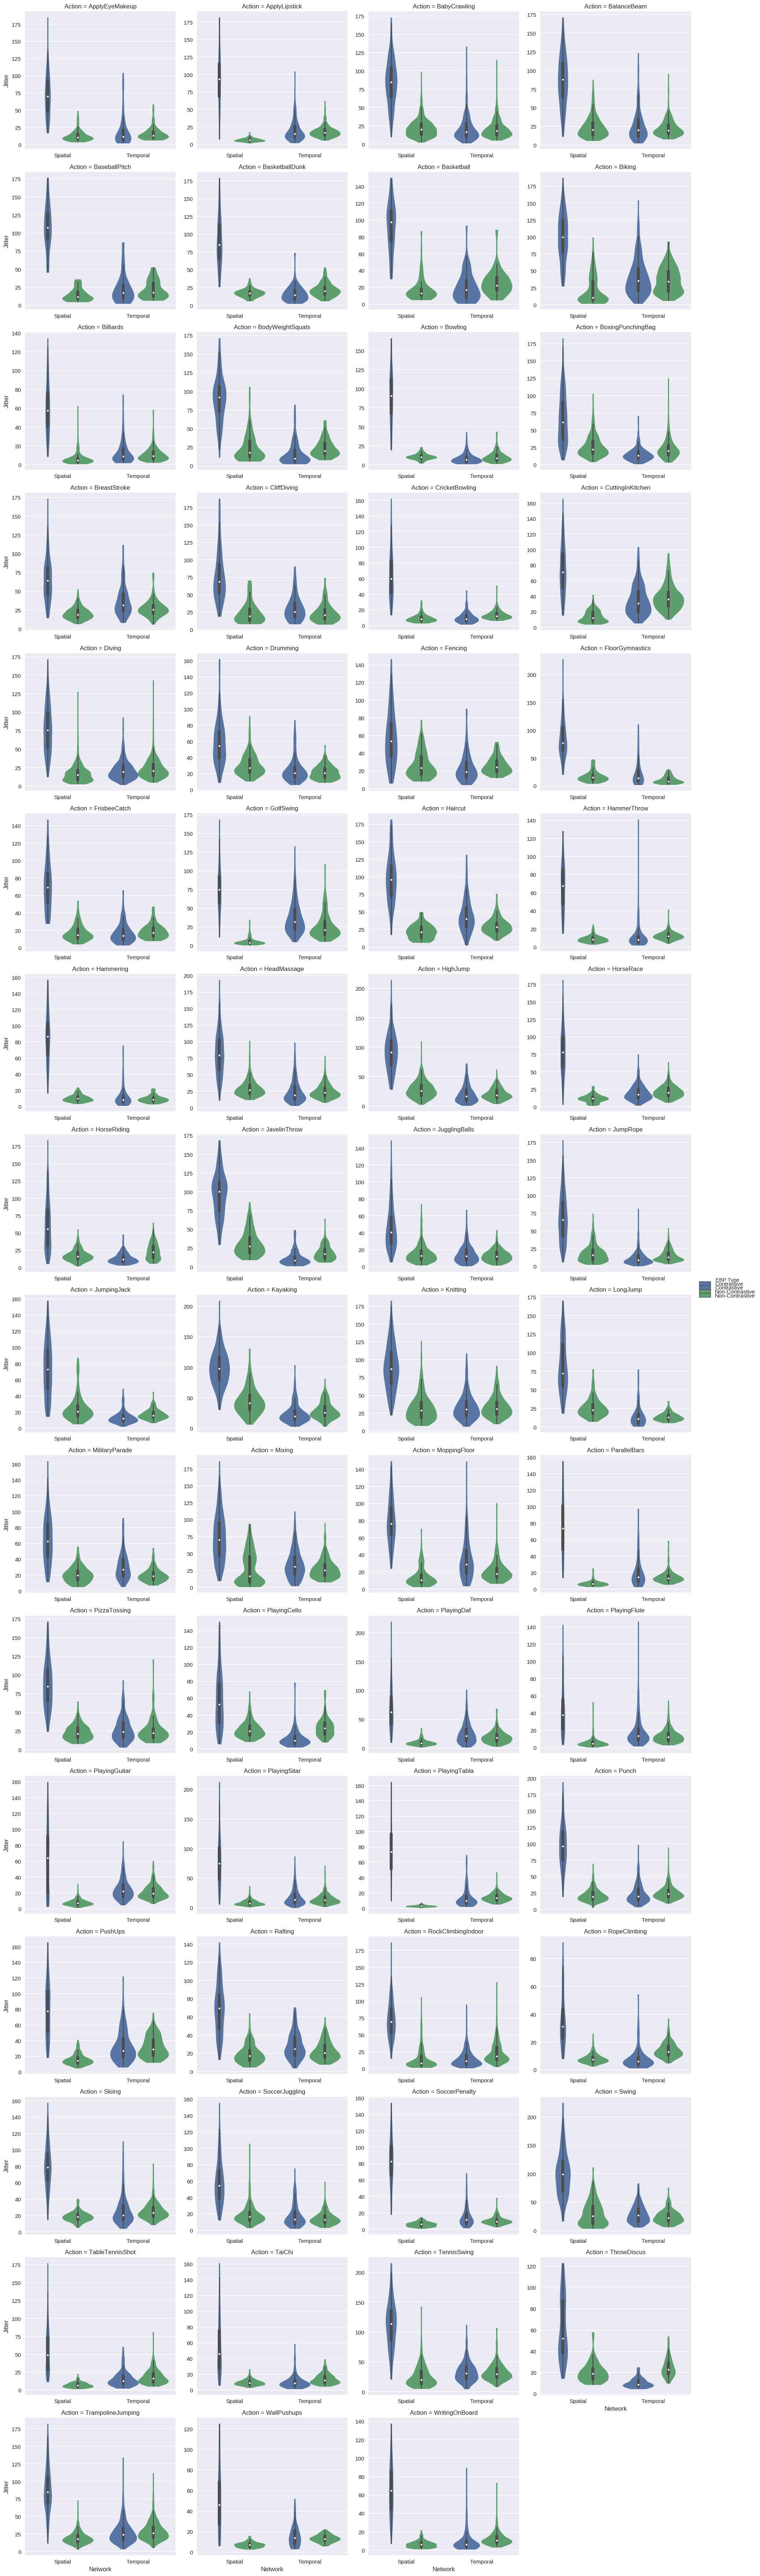

In [8]:
grid = sns.factorplot(data=jitter_df, 
                     x='Network',
                     y='Jitter',
                     col='Action', 
                     hue="EBP Type",
                     col_wrap=4, 
                     kind='violin',
                     cut=0,
                     sharey=False,
                     sharex=False
                     )
grid.add_legend()

In [9]:
jitter_average_by_clip = jitter_df.groupby(['Network', 'EBP Type', 'Clip'])\
    .mean()\
    .reset_index()
    
idx_max = jitter_average_by_clip.groupby(['Network', 'EBP Type'])['Jitter'].idxmax()
idx_min = jitter_average_by_clip.groupby(['Network', 'EBP Type'])['Jitter'].idxmin()

display("min")
display(jitter_average_by_clip.iloc[idx_min])
display("max")
display(jitter_average_by_clip.iloc[idx_max])

min_clips = jitter_average_by_clip.iloc[idx_min]['Clip']
max_clips = jitter_average_by_clip.iloc[idx_max]['Clip']

'min'

,Network,EBP Type,Clip,Frame,Jitter,Window Size
70,Spatial,Contrastive,v_PlayingGuitar_g05_c01,124.5,31.028204,1.0
174,Spatial,Non-Contrastive,v_PlayingTabla_g07_c01,125.0,2.907322,1.0
281,Temporal,Contrastive,v_RopeClimbing_g05_c07,73.5,8.134437,10.0
337,Temporal,Non-Contrastive,v_Hammering_g07_c05,58.5,9.405904,10.0


'max'

,Network,EBP Type,Clip,Frame,Jitter,Window Size
88,Spatial,Contrastive,v_Swing_g06_c07,25.0,126.846386,1.0
160,Spatial,Non-Contrastive,v_Mixing_g05_c04,58.5,52.699370,1.0
235,Temporal,Contrastive,v_Haircut_g06_c01,43.5,44.585683,10.0
355,Temporal,Non-Contrastive,v_Knitting_g07_c05,102.5,38.627780,10.0


In [10]:
jitter_average_by_clip = jitter_df.groupby(['Network', 'EBP Type', 'Clip'])\
    .mean()\
    .reset_index()
    
idx_max = jitter_average_by_clip.groupby(['Network', 'EBP Type'])['Jitter'].idxmax()
idx_min = jitter_average_by_clip.groupby(['Network', 'EBP Type'])['Jitter'].idxmin()

display("min")
display(jitter_average_by_clip.iloc[idx_min])
display("max")
display(jitter_average_by_clip.iloc[idx_max])

min_clips = jitter_average_by_clip.iloc[idx_min]['Clip']
max_clips = jitter_average_by_clip.iloc[idx_max]['Clip']

'min'

,Network,EBP Type,Clip,Frame,Jitter,Window Size
70,Spatial,Contrastive,v_PlayingGuitar_g05_c01,124.5,31.028204,1.0
174,Spatial,Non-Contrastive,v_PlayingTabla_g07_c01,125.0,2.907322,1.0
281,Temporal,Contrastive,v_RopeClimbing_g05_c07,73.5,8.134437,10.0
337,Temporal,Non-Contrastive,v_Hammering_g07_c05,58.5,9.405904,10.0


'max'

,Network,EBP Type,Clip,Frame,Jitter,Window Size
88,Spatial,Contrastive,v_Swing_g06_c07,25.0,126.846386,1.0
160,Spatial,Non-Contrastive,v_Mixing_g05_c04,58.5,52.699370,1.0
235,Temporal,Contrastive,v_Haircut_g06_c01,43.5,44.585683,10.0
355,Temporal,Non-Contrastive,v_Knitting_g07_c05,102.5,38.627780,10.0


In [11]:
jitter_average_by_clip.sort_values(by=['Network', 'EBP Type', 'Jitter']).groupby(['Network', 'EBP Type']).head(2)

,Network,EBP Type,Clip,Frame,Jitter,Window Size
70,Spatial,Contrastive,v_PlayingGuitar_g05_c01,124.5,31.028204,1.0
67,Spatial,Contrastive,v_PlayingFlute_g03_c05,99.5,34.444198,1.0
174,Spatial,Non-Contrastive,v_PlayingTabla_g07_c01,125.0,2.907322,1.0
198,Spatial,Non-Contrastive,v_WritingOnBoard_g04_c03,73.5,3.669110,1.0
281,Temporal,Contrastive,v_RopeClimbing_g05_c07,73.5,8.134437,10.0
216,Temporal,Contrastive,v_Bowling_g01_c01,74.5,8.731374,10.0
337,Temporal,Non-Contrastive,v_Hammering_g07_c05,58.5,9.405904,10.0
384,Temporal,Non-Contrastive,v_SoccerPenalty_g01_c06,41.0,9.442688,10.0


In [12]:
jitter_average_by_clip.sort_values(by=['Network', 'EBP Type', 'Jitter'], ascending=[True, True, False]).groupby(['Network', 'EBP Type']).head(2)

,Network,EBP Type,Clip,Frame,Jitter,Window Size
88,Spatial,Contrastive,v_Swing_g06_c07,25.0,126.846386,1.0
92,Spatial,Contrastive,v_TennisSwing_g07_c02,123.5,112.737482,1.0
160,Spatial,Non-Contrastive,v_Mixing_g05_c04,58.5,52.699370,1.0
188,Spatial,Non-Contrastive,v_Swing_g06_c07,25.0,50.947898,1.0
235,Temporal,Contrastive,v_Haircut_g06_c01,43.5,44.585683,10.0
258,Temporal,Contrastive,v_Mixing_g01_c04,55.5,42.424575,10.0
355,Temporal,Non-Contrastive,v_Knitting_g07_c05,102.5,38.627780,10.0
323,Temporal,Non-Contrastive,v_CuttingInKitchen_g01_c01,145.5,38.299968,10.0
